## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the data and filtering

In [2]:
# =============================================================================
# Data Import & Feature Extraction
# =============================================================================
# dataset = pd.read_csv("./MLData/Churn Modelling-Bank Customers.csv")
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML and DL course - Oracle/Day 4/Churn Modelling-Bank Customers.csv")

X = dataset.iloc[:, 3:13]          # X dataframe
y = dataset.iloc[:,13].values      # y array

In [3]:
# =============================================================================
# Encode Categorical values using get_dummies
# =============================================================================

X = pd.get_dummies(X,drop_first=True)

X = X.values    # convert it to array

In [4]:
# =============================================================================
# Train Test Split 
# =============================================================================
from sklearn.model_selection import train_test_split
# Doing an 80-20 split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [5]:
# =============================================================================
# Scaling of Values
# =============================================================================
from sklearn.preprocessing import StandardScaler
scObj = StandardScaler()

X_train = scObj.fit_transform(X_train)
X_test = scObj.transform(X_test)

In [6]:
# =============================================================================
# NEURAL NETWORK IMPLEMENTATION
# =============================================================================
import keras
from keras.models import Sequential
from keras.layers import Dense
# =============================================================================
# Initialization of Neural Network
# It's important to feed Numpy data to Keras, this is later imported to Tensors
# =============================================================================
classifier = Sequential()

### Additional comments

In [8]:
# =============================================================================
# Adding both Input & Hidden Layers using Dense
# First Input Layer adding with 11 Neurons
# Output Layer Predicting Exit column values 0/1,
# binary classification, single neuron in output Layer

## Second Hidden Layer adding Neurons ?????
"""
Minimum Number of Neurons in Hidden Layer == NN Underfits

Number of Neurons in Hidden Layer to start with = 
(NumberOfNeuronsInInputLayer+NumberOfNeuronsInOutputLayer)/2
= (11 + 1) = 6


Maximum Number of Neurons in Hidden Layer == NN OverFits
MaxNumOfNeurons == 5 times the minimum 


Number of Hidden Layers,

if NumOfInputFeatures < 5, start with minimum 1 HL
if NumOfInputFeatures > 5, start with minimum 2 HL
"""

'\nMinimum Number of Neurons in Hidden Layer == NN Underfits\n\nNumber of Neurons in Hidden Layer to start with = \n(NumberOfNeuronsInInputLayer+NumberOfNeuronsInOutputLayer)/2\n= (11 + 1) = 6\n\n\nMaximum Number of Neurons in Hidden Layer == NN OverFits\nMaxNumOfNeurons == 5 times the minimum \n\n\nNumber of Hidden Layers,\n\nif NumOfInputFeatures < 5, start with minimum 1 HL\nif NumOfInputFeatures > 5, start with minimum 2 HL\n'

### Continued implementation

#### Adding the input layer with the following information:


* Dense() is in charge of adding an extra layer
* Input layer is starting with 11 neurons
* Units is 6 adding nodes to a hidden layer
* The kernel_initializer 
  * The uniform strategy is giving the weights the same value
* The activation strategy is the one that will 

In [7]:
# =============================================================================
# Add InputLayer with 11 Neurons and 1st Hidden Layer with 6 Neurons
# =============================================================================
# classifier.add(Dense(input_dim=11, units=6, kernel_initializer='uniform', activation='relu'))
classifier.add(Dense(input_dim=11, units=24, kernel_initializer='uniform', activation='relu'))

#### Adding the Hidden Layers of the model

In [8]:
## Add 2nd Hidden Layer with 6 Neurons
# classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))
classifier.add(Dense(units=24, kernel_initializer='uniform', activation='relu'))

In [9]:
## Add output Layer , single Neuron, predict 0/1
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

#### Getting the information of the model

In [10]:
# NN summary
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                288       
                                                                 
 dense_1 (Dense)             (None, 24)                600       
                                                                 
 dense_2 (Dense)             (None, 1)                 25        
                                                                 
Total params: 913
Trainable params: 913
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Function to get the weights of a specific layer
classifier.get_layer('dense').get_weights()

[array([[-0.04003539],
        [-0.02771568],
        [ 0.03107989],
        [-0.03077616],
        [-0.02325369],
        [ 0.02045078]], dtype=float32), array([0.], dtype=float32)]

#### Compiler Settings for ANN
- Optimizer is the that would do the task of optimal weight finding for your NN
- Algorithm used by Optimizer for Weight Updation is Stochastic Gradient descent


In [11]:
# =============================================================================
# Compiler Settings for ANN
# Optimizer is the that would do the task of optimal weight finding for your NN
# Algorithm used by Optimizer for Weight Updation is Stochastic Gradient descent
# =============================================================================
# adam = adaptive momentum
# binary crossenthropy - helps us to calculate the accuracyof the model
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#### Neural Network Learning, Model Learning
- batch_size = 10          
  - weight update happens after every 10 rows batch mini batch GD
  - The accuracy may vary because we don't have an optimal Neural Network
- batch_size = 1            weight update happens after every 1 rows    ##  SGD
- batch_size = 8000 (train dataset size)  weight update happens after entire set of rows   ## batch GD

In [12]:
history=classifier.fit(X_train, y_train, batch_size=25, epochs=100)
# In order to tune the model we have to tweak the values of the layers
# Can be automated

Epoch 1/100
320/320 [==============================] - 2s 4ms/step - loss: 0.4896 - accuracy: 0.7952
Epoch 2/100
320/320 [==============================] - 1s 4ms/step - loss: 0.4235 - accuracy: 0.8058
Epoch 3/100
320/320 [==============================] - 1s 3ms/step - loss: 0.4146 - accuracy: 0.8289
Epoch 4/100
320/320 [==============================] - 1s 2ms/step - loss: 0.4082 - accuracy: 0.8316
Epoch 5/100
320/320 [==============================] - 1s 2ms/step - loss: 0.4034 - accuracy: 0.8331
Epoch 6/100
320/320 [==============================] - 1s 2ms/step - loss: 0.4014 - accuracy: 0.8359
Epoch 7/100
320/320 [==============================] - 1s 2ms/step - loss: 0.3989 - accuracy: 0.8355
Epoch 8/100
320/320 [==============================] - 1s 2ms/step - loss: 0.3974 - accuracy: 0.8363
Epoch 9/100
320/320 [==============================] - 1s 2ms/step - loss: 0.3956 - accuracy: 0.8357
Epoch 10/100
320/320 [==============================] - 1s 2ms/step - loss: 0.3925 - accura

#### Plotting the loss of the model

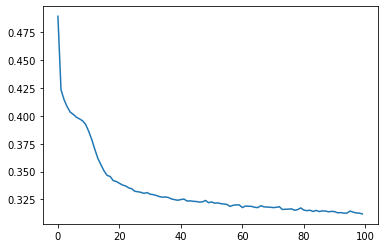

In [13]:
plt.plot(history.history['loss'])
plt.show()

#### Testing the model

In [14]:
y_pred = classifier.predict(X_test)
# We check if any value above of 0.5 and if its true it becomes  
y_pred = y_pred > 0.5
print("New value of y_pred is:", y_pred)

New value of y_pred is: [[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


#### Meaurement of the accuracy

In [16]:
# =============================================================================
# Accuracy Measure
# =============================================================================
from sklearn.metrics import confusion_matrix,accuracy_score

cm = confusion_matrix(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)

print(f"The Confusion matrix if {cm}\n\nThe accuracy of the model is {acc}")

The Confusion matrix if [[1466  129]
 [ 171  234]]

The accuracy of the model is 0.85
